# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The Traveling Salesman Problem

__Goal:__ Find the shortest tour visiting each of $n$ cities once. Given are pairwise distances between cities. 

__State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  with the order in which the cities are visited (a permutation).

__Objective function:__ Minimize the tour length.

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$\mathrm{argmin}_\pi [ \mathrm{tourLength}(\pi) ]$$

$$\text{s.t.}\ \pi \ \text{is a valid permutation vector}$$

__Local moves:__ Exchange two cities in the order.

## Helper functions


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('precision', 2)


def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[0, 9, 8, 7, 6, 2, 4, 5, 1, 3]

In [42]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.34  0.33
1  0.79  0.16
2  0.83  0.80
3  0.19  0.92
4  0.06  0.59
5  0.41  0.20
6  0.96  0.56
7  0.36  0.33
8  0.76  0.64
9  0.61  0.53
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  0.48  0.68  0.61  0.38  0.14  0.66  0.02  0.52  0.34
1  0.48  0.00  0.64  0.96  0.84  0.38  0.43  0.46  0.48  0.41
2  0.68  0.64  0.00  0.64  0.79  0.73  0.28  0.66  0.17  0.35
3  0.61  0.96  0.64  0.00  0.35  0.75  0.85  0.61  0.62  0.57
4  0.38  0.84  0.79  0.35  0.00  0.52  0.90  0.40  0.70  0.55
5  0.14  0.38  0.73  0.75  0.52  0.00  0.66  0.14  0.56  0.38
6  0.66  0.43  0.28  0.85  0.90  0.66  0.00  0.64  0.22  0.35
7  0.02  0.46  0.66  0.61  0.40  0.14  0.64  0.00  0.50  0.32
8  0.52  0.48  0.17  0.62  0.70  0.56  0.22  0.50  0.00  0.19
9  0.34  0.41  0.35  0.57  0.55  0.38  0.35  0.32  0.19  0.00)


In [43]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

5.060588313491766

Tour length: 5.06


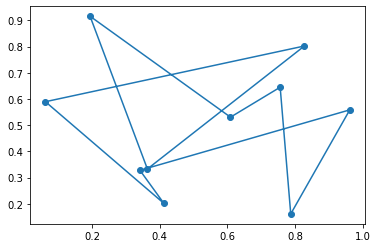

In [44]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if tour is not None:
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()
        
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pos_.append(pos_.head(1))
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

Load rpy2, make sure the TSP package is installed and prepare the distance matrix.

In [45]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")

d = tsp["dist"]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Solve the TSP using [`solve_TSP`](https://www.rdocumentation.org/packages/TSP/versions/1.1-10/topics/solve_TSP) with the default heuristic. Note that 2-opt is steepest ascend hill climbing with exchanging two cities. `rep=100` means 100 random restarts.

In [46]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp, rep = 100)
print(tour)

# R starts index with 1, but Python starts at 0
tour <- tour - 1L

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt_rep_100’ for 10 cities
tour length: 2.911306 


Tour length: 2.91


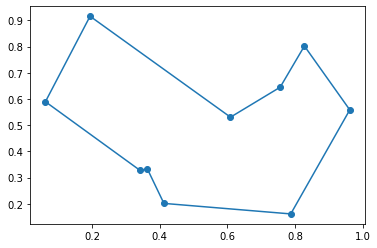

In [47]:
show_tsp(tsp, tour)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [48]:
# Code goes here

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [49]:
# Code goes here

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [50]:
# Code goes here

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [51]:
# Code goes here

## Simulated Annealing [2 Points]

In [52]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [53]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.9119510650634766 milliseconds


In [54]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [55]:
# Code goes here